In [0]:
# Step 1 Data Processing

from keras.preprocessing import sequence
from keras.datasets import imdb

max_words= 20000
max_len = 80
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
X_train = sequence.pad_sequences(X_train,maxlen=max_len,padding='pre', truncating='pre')
X_test = sequence.pad_sequences(X_test,maxlen=max_len)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
# Step 2 Define Model

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU

In [0]:
model = Sequential()
model.add(Embedding(max_words,128))
model.add(LSTM(32,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
# Step 3: Compile Model

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(X_train,y_train, epochs=10,
                   batch_size=100,
                    validation_data=(X_test,y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 45s 2ms/step - loss: 0.4496 - acc: 0.7840 - val_loss: 0.3651 - val_acc: 0.8434
Epoch 2/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.2523 - acc: 0.9009 - val_loss: 0.3886 - val_acc: 0.8357
Epoch 3/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.1615 - acc: 0.9402 - val_loss: 0.4190 - val_acc: 0.8318
Epoch 4/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.1024 - acc: 0.9642 - val_loss: 0.5796 - val_acc: 0.8086
Epoch 5/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.0700 - acc: 0.9756 - val_loss: 0.6346 - val_acc: 0.8198
Epoch 6/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0477 - acc: 0.9844 - val_loss: 0.7074 - val_acc: 0.8167
Epoch 7/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0452 - acc: 0.9862 - val_loss: 0.7613 - val_ac

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
losss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1,len(acc)+1)

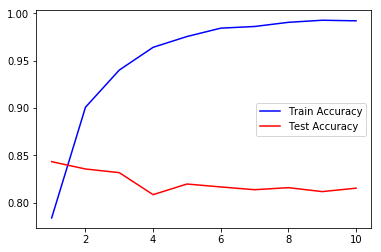

In [0]:
plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.show()